In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, t

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sample = pd.read_csv('~data/samples.csv')
sample = sample[["label","sampleTime","intestinalEnterococciCount","escherichiaColiCount"]]
sample['sampleTime'] = sample['sampleTime'].str[:10]
sample = sample.rename(columns={'label': 'site', 'sampleTime': 'time'})
sample

,site,time,intestinalEnterococciCount,escherichiaColiCount
0,Seaton Carew North,2022-05-06,18,10
1,Seaton Carew North,2022-05-19,45,10
2,Seaton Carew North,2022-05-25,130,310
3,Seaton Carew North,2022-05-31,10,10
4,Seaton Carew North,2022-06-08,250,270
...,...,...,...,...
7204,Westward Ho!,2022-08-18,10,10
7205,Westward Ho!,2022-08-25,10,10
7206,Westward Ho!,2022-09-08,64,45
7207,Westward Ho!,2022-09-13,10,10


In [4]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting

,site,time,warning,riskLevelLabel
0,ukc1101-06000,2022-04-28,Pollution RIsk Forecasts will start soon,normal
1,ukc1101-06000,2022-04-29,Pollution RIsk Forecasts will start soon,normal
2,ukc1101-06000,2022-04-30,Pollution RIsk Forecasts will start soon,normal
3,ukc1101-06000,2022-05-04,No warnings in place,normal
4,ukc1101-06000,2022-05-05,No warnings in place,normal
...,...,...,...,...
63573,ukk4307-33900,2022-09-26,No pollution incidents reported,normal
63574,ukk4307-33900,2022-09-27,No pollution incidents reported,normal
63575,ukk4307-33900,2022-09-28,No pollution incidents reported,normal
63576,ukk4307-33900,2022-09-29,No pollution incidents reported,normal


In [5]:
feature = pd.read_csv('~data/feature_extraction_51x51.csv')
feature

,time,site,TUR_1x1_median,SPM_1x1_median,CHL_1x1_median,TUR_1x1_mean,SPM_1x1_mean,CHL_1x1_mean,TUR_1x1_q1,SPM_1x1_q1,...,CHL_51x51_median,TUR_51x51_mean,SPM_51x51_mean,CHL_51x51_mean,TUR_51x51_q1,SPM_51x51_q1,CHL_51x51_q1,TUR_51x51_q3,SPM_51x51_q3,CHL_51x51_q3
0,2020-01-04,ukf3102-09100,108.93730,82.804050,9.694109,108.93730,82.804050,9.694109,108.93730,82.804050,...,7.786972,56.991574,39.174789,8.061594,43.640497,28.339942,6.656758,61.104443,41.905066,9.190117
1,2020-01-04,ukf3102-09200,116.36637,92.065480,9.894425,116.36637,92.065480,9.894425,116.36637,92.065480,...,8.937684,64.657951,45.736671,9.018375,49.536735,32.876476,7.464715,68.959285,48.319313,10.118837
2,2020-01-04,ukf3102-09400,107.69669,86.643550,13.944178,107.69669,86.643550,13.944178,107.69669,86.643550,...,9.186992,69.629040,49.706337,9.381335,60.110758,41.077278,8.235911,73.797290,53.108590,10.310409
3,2020-01-04,ukf3102-09600,157.11348,131.455100,14.738614,157.11348,131.455100,14.738614,157.11348,131.455100,...,8.160086,52.962076,37.057555,8.556871,38.118608,24.710560,7.108883,63.412932,44.594133,9.660246
4,2020-01-04,ukf3102-09700,117.12625,93.854904,12.754065,117.12625,93.854904,12.754065,117.12625,93.854904,...,7.084467,31.324775,20.877057,7.982920,17.733513,10.922977,6.416773,34.601340,22.003967,8.369608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113421,2022-11-28,ukk3101-26530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.410271,3.176707,1.859303,2.536886,2.869820,1.673176,2.258490,3.312921,1.941688,2.688667
113422,2022-12-07,ukk4200-23200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.443477,10.726367,6.459139,8.443477,10.726367,6.459139,8.443477,10.726367,6.459139,8.443477
113423,2022-12-07,ukk4306-23000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.248995,6.791190,4.061143,5.279060,6.673853,3.990707,5.188523,6.821655,4.078659,5.339532
113424,2022-12-17,ukc2103-04600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.037140,23.244257,14.438895,8.037140,23.233103,14.434131,7.982498,23.255411,14.443659,8.091781


In [6]:
print(feature.shape)
print(feature.isnull().sum()) 

(113426, 314)
time                  0
site                  0
TUR_1x1_median    78440
SPM_1x1_median    78440
CHL_1x1_median    78440
                  ...  
SPM_51x51_q1          0
CHL_51x51_q1          0
TUR_51x51_q3          0
SPM_51x51_q3          0
CHL_51x51_q3          0
Length: 314, dtype: int64


# Comparing values of all pixels from 1x1 to 11x11

In [7]:
TUR_df = feature.filter(regex='^TUR').groupby(lambda x: x.split('_')[-1], axis=1)
TUR_agg_df = pd.concat([group.mean() for name, group in TUR_df])

TUR_df = pd.DataFrame(TUR_agg_df.items(), columns=['group', 'value'])
TUR_df['statistic'] = TUR_df['group'].apply(lambda x: x.split('_')[-1])
TUR_df['group'] = TUR_df['group'].apply(lambda x: x.split('_')[1])

SPM_df = feature.filter(regex='^SPM').groupby(lambda x: x.split('_')[-1], axis=1)
SPM_agg_df = pd.concat([group.mean() for name, group in SPM_df])

SPM_df = pd.DataFrame(SPM_agg_df.items(), columns=['group', 'value'])
SPM_df['statistic'] = SPM_df['group'].apply(lambda x: x.split('_')[-1])
SPM_df['group'] = SPM_df['group'].apply(lambda x: x.split('_')[1])


CHL_df = feature.filter(regex='^CHL').groupby(lambda x: x.split('_')[-1], axis=1)
CHL_agg_df = pd.concat([group.mean() for name, group in CHL_df])

CHL_df = pd.DataFrame(CHL_agg_df.items(), columns=['group', 'value'])
CHL_df['statistic'] = CHL_df['group'].apply(lambda x: x.split('_')[-1])
CHL_df['group'] = CHL_df['group'].apply(lambda x: x.split('_')[1])

In [8]:
TUR_df

,group,value,statistic
0,1x1,52.325115,mean
1,3x3,49.394522,mean
2,5x5,44.251329,mean
3,7x7,39.364916,mean
4,9x9,36.585486,mean
...,...,...,...
99,43x43,23.228766,q3
100,45x45,22.828635,q3
101,47x47,22.602886,q3
102,49x49,22.433919,q3


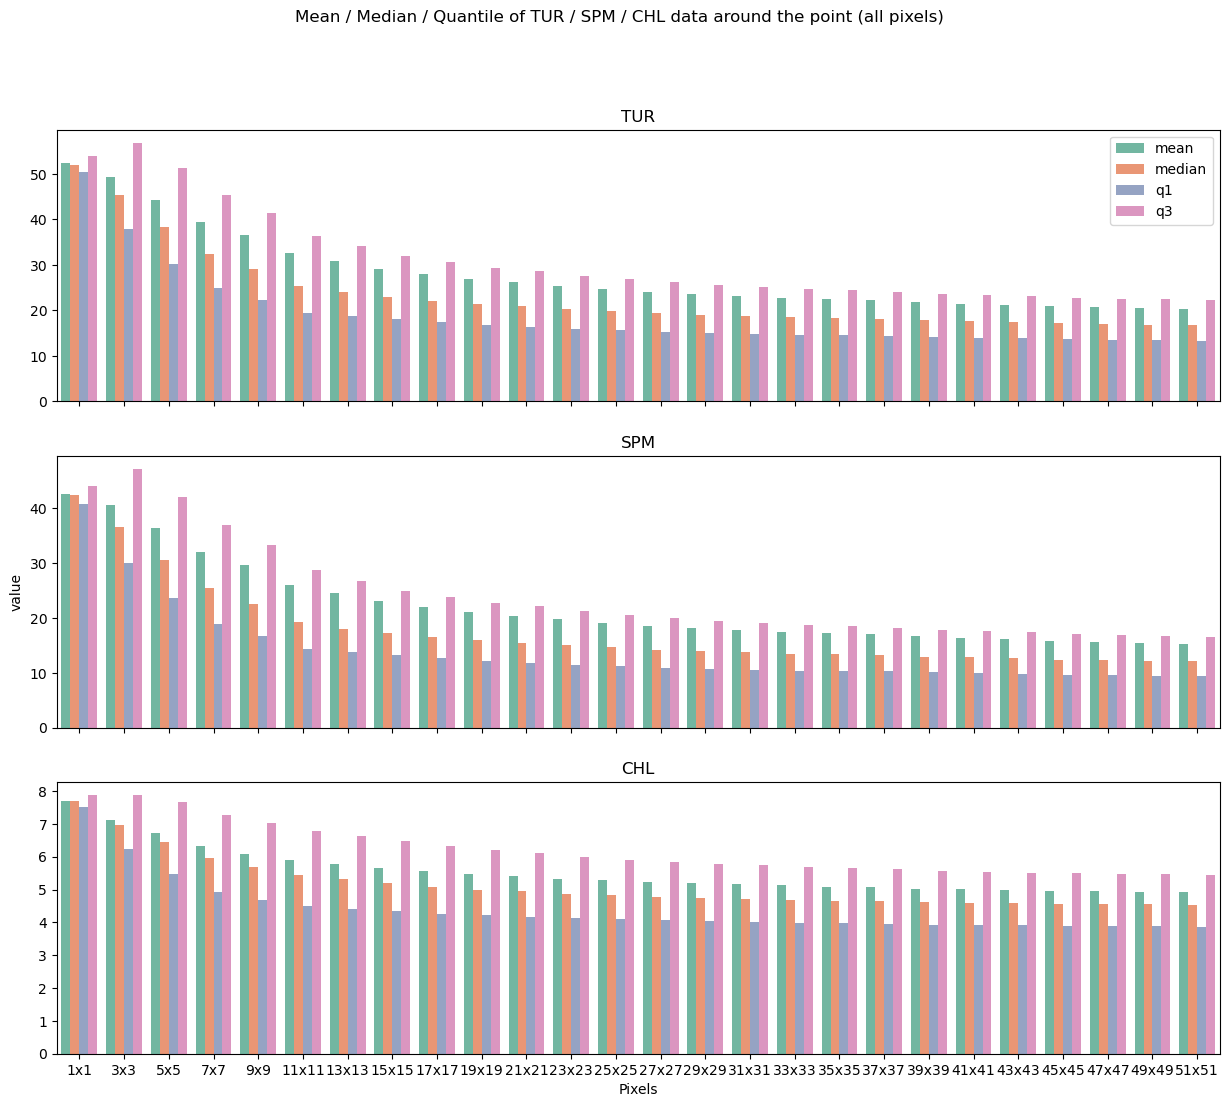

In [10]:
sns.set_palette("Set2")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 12), sharex=True)
plt.suptitle('Mean / Median / Quantile of TUR / SPM / CHL data around the point (all pixels)')

sns.barplot(data=TUR_df, x='group', y='value', hue='statistic', ax=ax1)
ax1.legend_.set_title(None)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.set_title('TUR')

sns.barplot(data=SPM_df, x='group', y='value', hue='statistic', ax=ax2)
ax2.set_title('SPM')
ax2.set(xlabel=None)
ax2.legend_.remove()

sns.barplot(data=CHL_df, x='group', y='value', hue='statistic', ax=ax3)
ax3.set_title('CHL')
ax3.set(xlabel='Pixels')
ax3.set(ylabel=None)
ax3.legend_.remove()

plt.show()

# 11x11 mean

In [10]:
df_11x11_mean = feature.iloc[:, :2].join(feature.iloc[:, -9:-6])
df_11x11_mean

,time,site,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean
0,2022-03-01,Ainsdale,NaN,NaN,NaN
1,2022-03-01,Allonby,NaN,NaN,NaN
2,2022-03-01,Allonby_South,NaN,NaN,NaN
3,2022-03-01,Amble_Links,NaN,NaN,NaN
4,2022-03-01,Anderby,NaN,NaN,NaN
...,...,...,...,...,...
101905,2022-10-31,Withernsea,NaN,NaN,NaN
101906,2022-10-31,Wolvercote_Mill_Stream,NaN,NaN,NaN
101907,2022-10-31,Woolacombe_Village,34.662595,25.860545,6.887635
101908,2022-10-31,Worthing,NaN,NaN,NaN


In [11]:
print(df_11x11_mean.shape)
print(df_11x11_mean.isnull().sum())

(101910, 5)
time                  0
site                  0
TUR_11x11_mean    73430
SPM_11x11_mean    73430
CHL_11x11_mean    73430
dtype: int64


## Bacteria&Ecoli count vs. SPM&TUR&CHL

In [12]:
df1 = pd.merge(df_11x11_mean, sample, on=['site','time'])
df1 = df1.dropna()
df1 = df1.rename({'intestinalEnterococciCount': 'IE_count', 'escherichiaColiCount': 'EC_count'}, axis=1)  # new method
df1

,time,site,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,IE_count,EC_count
13,2022-05-03,Heacham,30.878169,19.843502,9.983449,10,10
28,2022-05-03,Tankerton,58.544528,43.341505,8.576487,10,45
30,2022-05-04,Allonby,5.243375,3.263275,4.141318,18,36
31,2022-05-04,Beadnell,12.917741,10.625786,6.884509,10,10
32,2022-05-04,Broadsands,1.662952,0.976596,1.527455,10,10
...,...,...,...,...,...,...,...
2526,2022-09-21,Sandymouth,2.888979,1.717045,4.342654,10,10
2527,2022-09-21,Shaldon,7.304994,4.430155,4.880118,18,10
2528,2022-09-21,Summerleaze,9.577234,6.355938,5.521259,10,10
2556,2022-09-23,Leysdown,47.984569,33.167467,9.652560,27,18


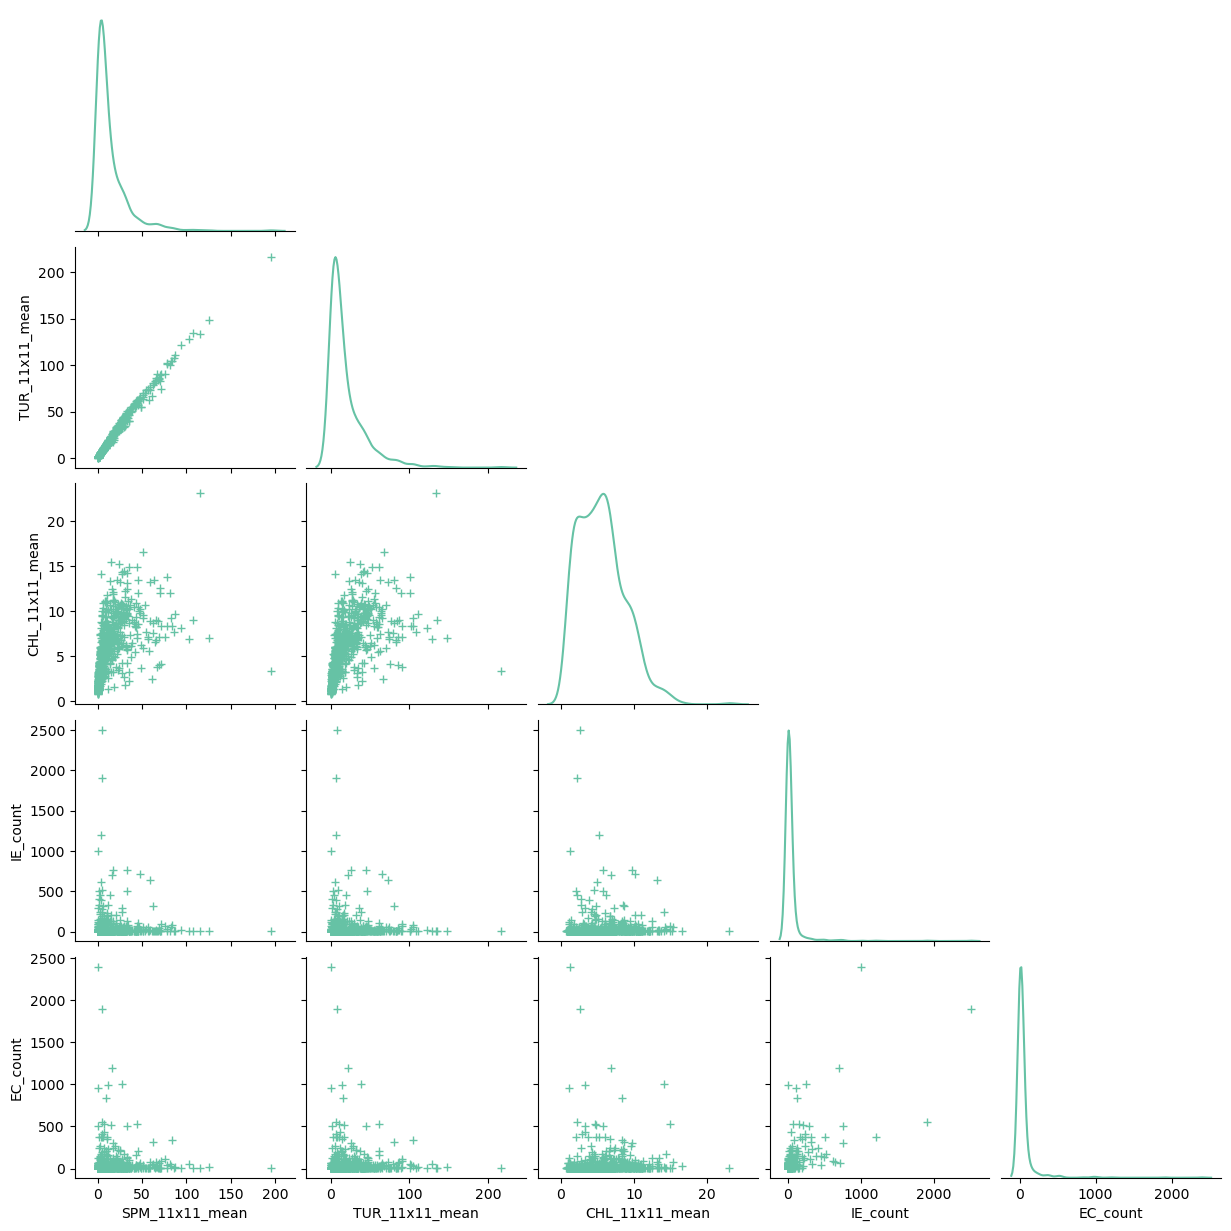

In [13]:
sns.pairplot(df1[["SPM_11x11_mean", "TUR_11x11_mean", "CHL_11x11_mean","IE_count", "EC_count"]], 
             diag_kind="kde",
             plot_kws=dict(marker="+", linewidth=1),
             diag_kws=dict(fill=False),
             corner=True)
plt.show()

In [14]:
methods = ['pearson', 'kendall', 'spearman']
for m in methods:
    corr_matrix = df1.corr(method=m)
    
    n = len(df1)
    df = n - 2

    results = []
    for col in ["IE_count", "EC_count"]:
        for row in ["SPM_11x11_mean", "TUR_11x11_mean", "CHL_11x11_mean"]:
            if row != col:
                corr_coef = corr_matrix.loc[row, col]
                t_value = corr_coef * ((n - 2) ** 0.5) / ((1 - corr_coef ** 2) ** 0.5)
                p_value = 2 * t.sf(abs(t_value), df)
                results.append((row, col, corr_coef, t_value, p_value))

    results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Correlation Coefficient', 't-value', 'p-value'])

    print("\n\033[1m" + m + " correlation \033[0m")
    print(results_df)


pearson correlation 
       Variable 1 Variable 2  Correlation Coefficient   t-value   p-value
0  SPM_11x11_mean   IE_count                 0.000714  0.019705  0.984284
1  TUR_11x11_mean   IE_count                 0.001412  0.038984  0.968914
2  CHL_11x11_mean   IE_count                -0.006037 -0.166658  0.867683
3  SPM_11x11_mean   EC_count                 0.008524  0.235317  0.814026
4  TUR_11x11_mean   EC_count                 0.008590  0.237143  0.812610
5  CHL_11x11_mean   EC_count                 0.010367  0.286188  0.774812

kendall correlation 
       Variable 1 Variable 2  Correlation Coefficient   t-value   p-value
0  SPM_11x11_mean   IE_count                 0.105786  2.936643  0.003418
1  TUR_11x11_mean   IE_count                 0.108543  3.014057  0.002663
2  CHL_11x11_mean   IE_count                 0.106812  2.965434  0.003117
3  SPM_11x11_mean   EC_count                 0.161523  4.518059  0.000007
4  TUR_11x11_mean   EC_count                 0.164646  4.607844  0.0

There is significant correlation between the variables when using Kendall and Spearman correlation coefficients, while there is no significant correlation when using Pearson correlation coefficient.

## Warnings vs. SPM&TUR&CHL

In [20]:
df2 = pd.merge(df_11x11_mean, riskforecasting, on=['site','time'])
df2 = df2.dropna()
df2

,time,site,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,warning,riskLevelLabel
3,2022-03-17,Frinton,119.602328,123.807567,8.214204,"Pollution incident ended, no forecast available",normal
4,2022-03-17,Holland,100.306580,120.473114,8.594822,"Pollution incident ended, no forecast available",normal
5,2022-03-25,Saltburn,28.619714,20.838840,8.042007,"Pollution incident ended, no forecast available",normal
11,2022-04-28,Anderby,93.950831,70.109661,8.508453,Pollution RIsk Forecasts will start soon,normal
17,2022-04-28,Bexhill,19.778117,13.808608,10.534637,Pollution RIsk Forecasts will start soon,normal
...,...,...,...,...,...,...,...
22661,2022-09-30,Sutton-on-Sea,123.140806,110.938110,9.315174,No pollution incidents reported,normal
22663,2022-09-30,Tankerton,36.993651,26.043609,8.131128,No warnings in place,normal
22670,2022-09-30,Walton,106.958851,87.916485,7.594532,No warnings in place,normal
22673,2022-09-30,Wells,42.479288,31.916668,13.717114,No warnings in place,normal


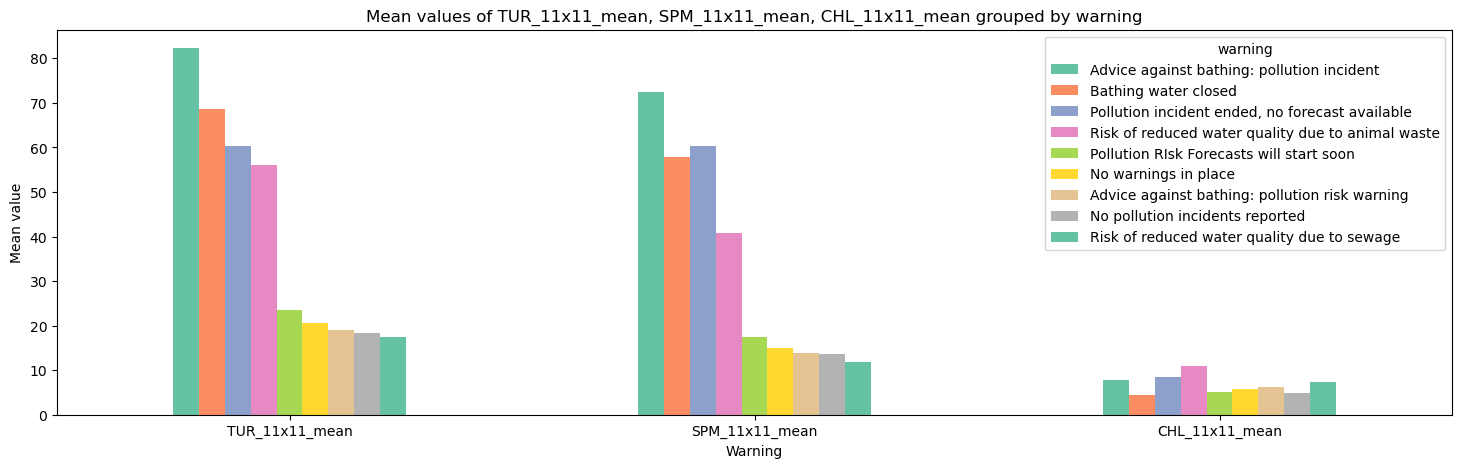

In [21]:
sns.set_palette("Set2")
grouped_warning = df2.groupby('warning')[['TUR_11x11_mean', 'SPM_11x11_mean', 'CHL_11x11_mean']].mean()
grouped_warning = grouped_warning.sort_values(by=['TUR_11x11_mean', 'SPM_11x11_mean', 'CHL_11x11_mean'], ascending=False)

grouped_warning.T.plot(kind='bar', figsize=(18, 5))
plt.title('Mean values of TUR_11x11_mean, SPM_11x11_mean, CHL_11x11_mean grouped by warning')
plt.xlabel('Warning')
plt.xticks(rotation=0)
plt.ylabel('Mean value')
plt.show()

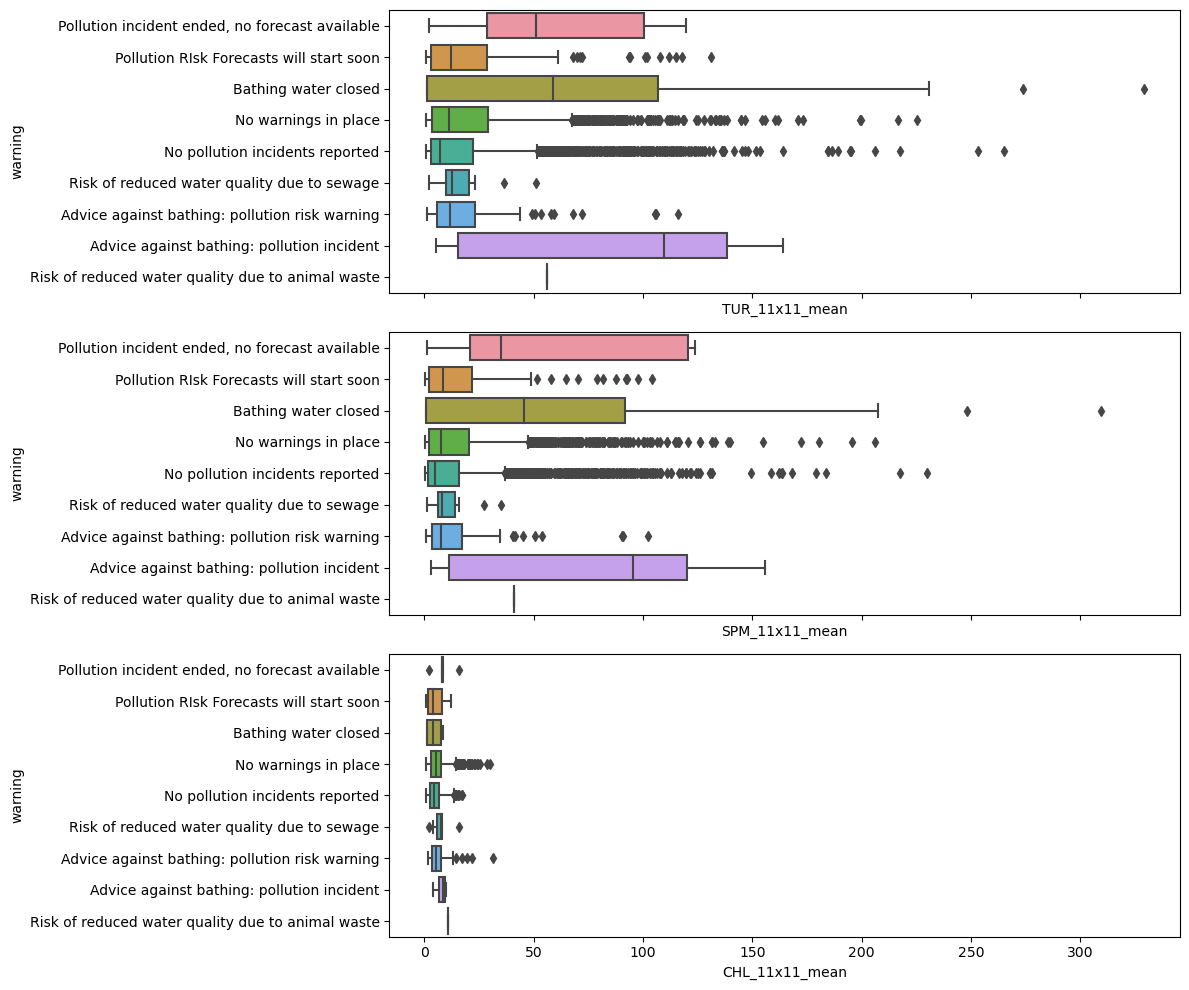

In [22]:

fig, axes = plt.subplots(nrows=3, figsize=(12, 10), sharex=True)

sns.boxplot(y='warning', x='TUR_11x11_mean', data=df2, ax=axes[0])
sns.boxplot(y='warning', x='SPM_11x11_mean', data=df2, ax=axes[1])
sns.boxplot(y='warning', x='CHL_11x11_mean', data=df2, ax=axes[2])

plt.tight_layout()
plt.show()

## riskLevelLabel vs. SPM&TUR&CHL

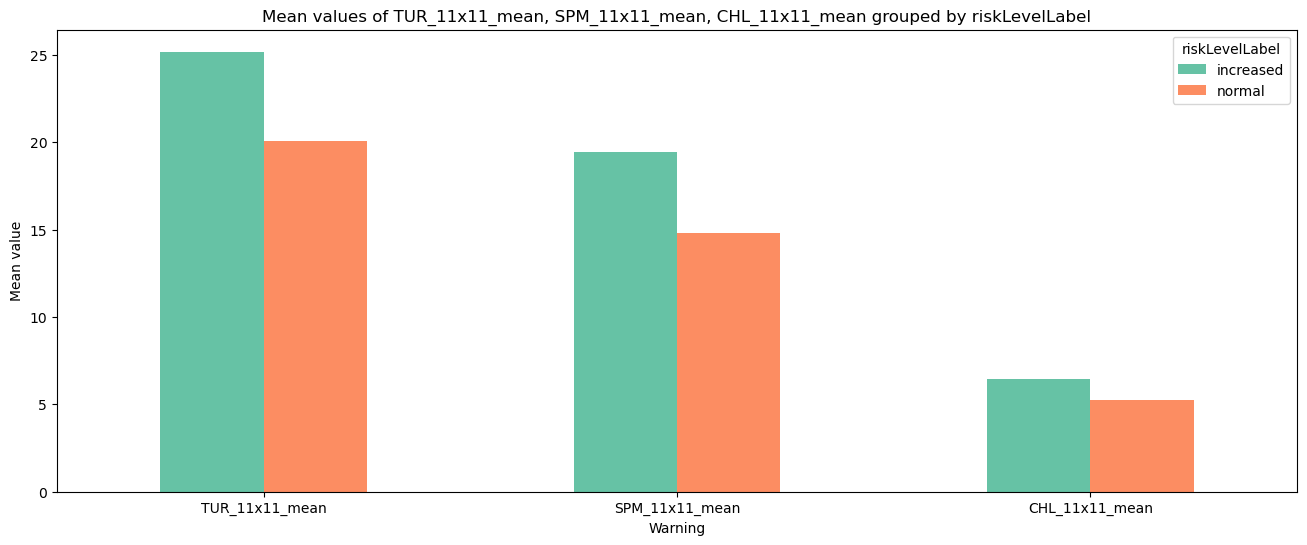

In [23]:
grouped_risk = df2.groupby('riskLevelLabel')[['TUR_11x11_mean', 'SPM_11x11_mean', 'CHL_11x11_mean']].mean()

grouped_risk.T.plot(kind='bar', figsize=(16, 6))
plt.title('Mean values of TUR_11x11_mean, SPM_11x11_mean, CHL_11x11_mean grouped by riskLevelLabel')
plt.xlabel('Warning')
plt.xticks(rotation=0)
plt.ylabel('Mean value')
plt.show()

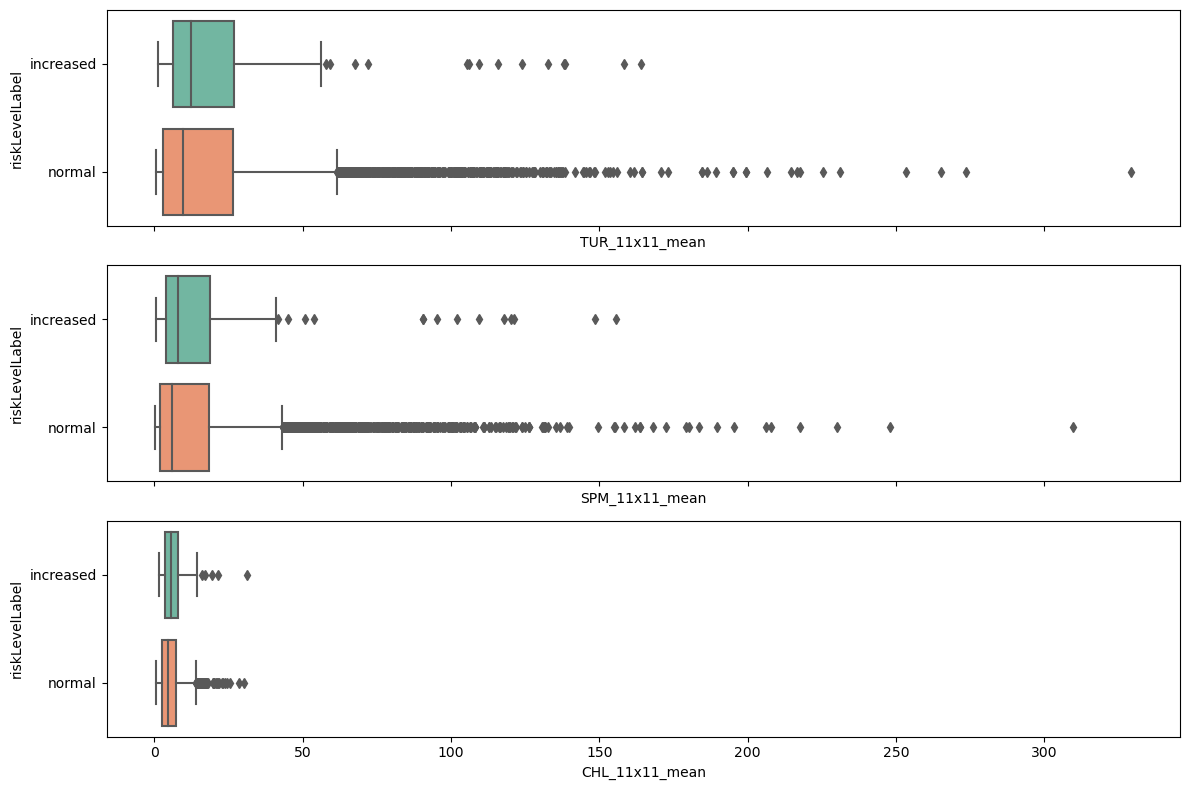

In [24]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

df2 = df2.sort_values(by=['riskLevelLabel'])
sns.boxplot(y='riskLevelLabel', x='TUR_11x11_mean', data=df2, ax=axes[0])
sns.boxplot(y='riskLevelLabel', x='SPM_11x11_mean', data=df2, ax=axes[1])
sns.boxplot(y='riskLevelLabel', x='CHL_11x11_mean', data=df2, ax=axes[2])

plt.tight_layout()
plt.show()